41.46556665170975 -5.107426693991457 0.09797078019708007 0.9909813089205097
0.0979707759652248 4.062413807871428 -5.10742719716717 0.9909813089205097
1.1028905310730712 4.267170417499375 0.9909812950188184


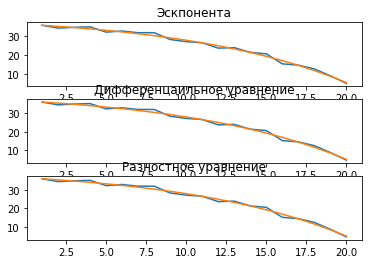

In [2]:
%matplotlib inline
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Считывание данных
df = pd.read_csv('task6.csv')
x = np.array(df.X)
y = np.array(df.Y)

# Определение функций
def func_exp(x, C1, C2, C3):
    return C1 + C2 * np.exp(C3 * x)

def func_de(t, K1, K2, C): #dx/dt = K1*x - K2
    return K2/K1 + C * np.exp(K1 * t)

def func_diff(t, L1, L2): #x(t+1) = L1*x(t)-L2
    def P1(i, L1, L2):
        if i == 0:
            return y[0]
        return(L1 * P1(i-1, L1, L2) - L2)
    return [P1(j, L1, L2) for j in range(len(t))]
                     
# Калибровка
exp  = curve_fit(func_exp,  x, y)
de   = curve_fit(func_de,   x, y)
diff = curve_fit(func_diff, x, y)

# Вывод на печать параметров и R2
print(*exp[0],  r2_score(y, func_exp (x, *exp [0])))
print(*de[0],   r2_score(y, func_de  (x, *de  [0])))
print(*diff[0], r2_score(y, func_diff(x, *diff[0])))

# Отрисовка
fig, axs = plt.subplots(3)

axs[0].set_title('Эскпонента')
axs[0].plot(x,y,
         x, func_exp(x, *exp[0]))

axs[1].set_title('Дифференцаильное уравнение')
axs[1].plot(x,y,
         x, func_de(x, *de[0]))

axs[2].set_title('Разностное уравнение')
axs[2].plot(x,y,
         x, func_diff(x, *diff[0]))

plt.show()